## Calculating a security's rate of return

### simple rate of return :
##### rate of return = (end price - beginning price) / (beginning price)

#### In case of dividend paid:
##### rate of return = (end price + dividend - beginning price) / (beginning price)

#### Logarithmic rate of return :
##### rate of return = log(end price - beginning price) = log(end price) - log(beginning price)

#### Annual return = [(daily return + 1)^356] * 100 - 1

In [2]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
PG = wb.DataReader('PG', data_source = 'yahoo', start = '1995-1-1')

In [4]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.063840
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.999201
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.886079
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.902242
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.869921


In [5]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-13,143.990005,142.690002,142.949997,143.639999,4888300.0,143.639999
2021-08-16,144.690002,143.380005,143.669998,144.639999,6040800.0,144.639999
2021-08-17,145.600006,143.889999,144.399994,144.880005,7577000.0,144.880005
2021-08-18,144.880005,143.179993,144.699997,143.300003,7161400.0,143.300003
2021-08-19,145.229996,143.160004,143.160004,145.074997,1793787.0,145.074997


#  Simple Rate of Return
## (P1 - P0) / P0 = (P1/P0) - 1 

In [7]:
PG["simple_return"] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1  #pandas.DataFrame.shift(# of lags) --> shifts index by #
print(PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002050
1995-01-09   -0.004090
                ...   
2021-08-13    0.004827
2021-08-16    0.006962
2021-08-17    0.001659
2021-08-18   -0.010906
2021-08-19    0.012387
Name: simple_return, Length: 6706, dtype: float64


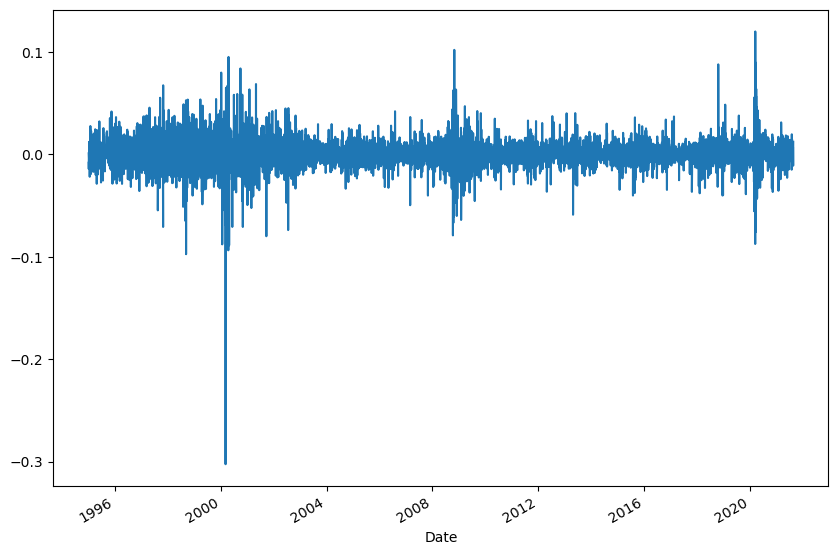

In [11]:
#plot
PG['simple_return'].plot(figsize = (10, 7))
plt.show()

In [18]:
#To calculate daily mean returns
avg_returns_d = PG['simple_return'].mean()
print(avg_returns_d)
print(str(round(avg_returns_d,5) * 100) + '%')

0.0005321314702876134
0.053%


In [19]:
#To calculate annual mean returns
avg_returns_a = PG['simple_return'].mean() * 250 #since the stock exchange does not operate on sats, suns and national holidays
print(avg_returns_a)
print(str(round(avg_returns_a,5) * 100) + '%')

0.13303286757190333
13.303%


# Logarithmic Returns

## ln(Pt/P(t-1))

#### Since we are calculating returns of a single stock over time, logarithmic returns are a preferable measure

In [ ]:
#NumPy offers the possibility  of vectorized computation
#vectorization - the ability to organize several kinds of data processing tasks as array expressions (array programming)

In [20]:
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
print(PG['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2021-08-13    0.004815
2021-08-16    0.006938
2021-08-17    0.001658
2021-08-18   -0.010965
2021-08-19    0.012310
Name: log_return, Length: 6706, dtype: float64


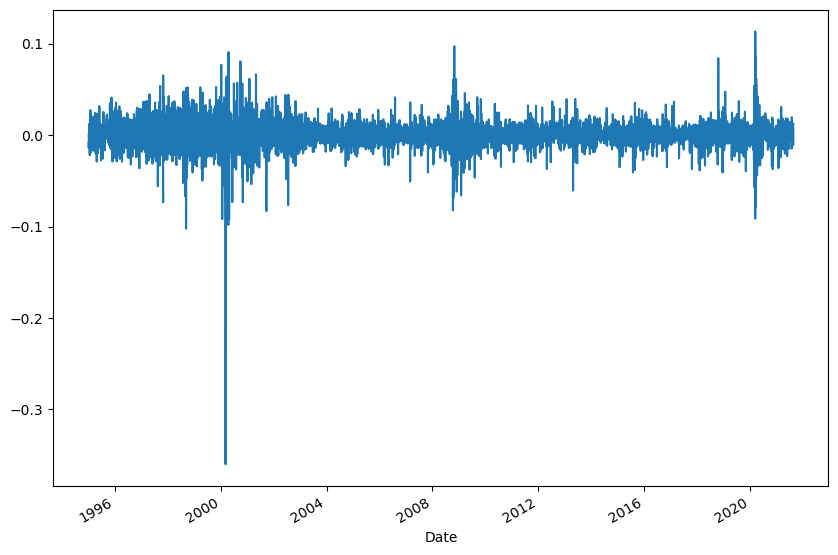

In [21]:
#plot
PG['log_return'].plot(figsize=(10,7))
plt.show()

In [22]:
#To calculate daily mean returns
log_return_d = PG['log_return'].mean()
print(log_return_d)
print(str(round(log_return_d,5) * 100) + '%') 

0.0004310008903862968
0.043%


In [23]:
#To calculate annual mean returns
log_return_a = PG['log_return'].mean() * 250
print(log_return_a)
print(str(round(log_return_a,5) * 100) + '%') 

0.1077502225965742
10.775%


# Calculating the rate of return of a porfolio
## rate of return for a security * weight in portfolio

In [25]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [27]:
tickers = ['PG','MSFT','F','GE']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start = '1995-1-1')['Adj Close']

In [28]:
data

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.063840,2.379199,4.380183,32.931717
1995-01-04,7.999201,2.396494,4.498034,32.931717
1995-01-05,7.886079,2.356964,4.458752,33.012394
1995-01-06,7.902242,2.396494,4.458752,32.850979
1995-01-09,7.869921,2.381670,4.537320,32.528118
...,...,...,...,...
2021-08-13,143.639999,292.290436,13.590000,104.919998
2021-08-16,144.639999,294.037109,13.460000,103.349998
2021-08-17,144.880005,292.519989,12.990000,101.620003


### Normalization to 100
#### (Pt / P0) * 100

In [29]:
data.iloc[0] #extract the first row of the data
#can use data.loc['1995-01-03'] as well
#iloc - index
#loc - label

PG       8.063840
MSFT     2.379199
F        4.380183
GE      32.931717
Name: 1995-01-03 00:00:00, dtype: float64

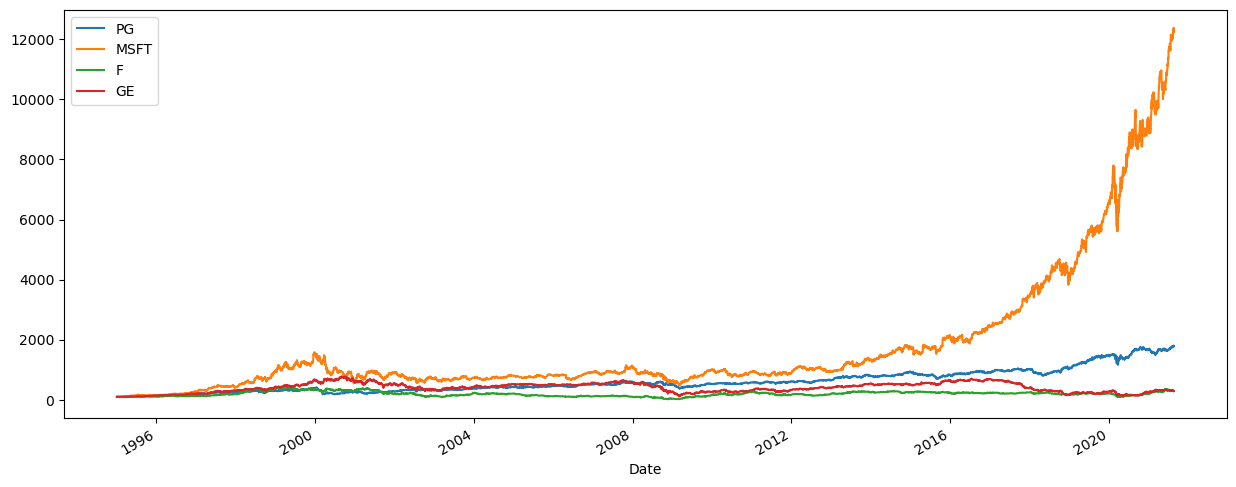

In [32]:
(data / data.iloc[0] * 100).plot(figsize = (15,6))
plt.show()

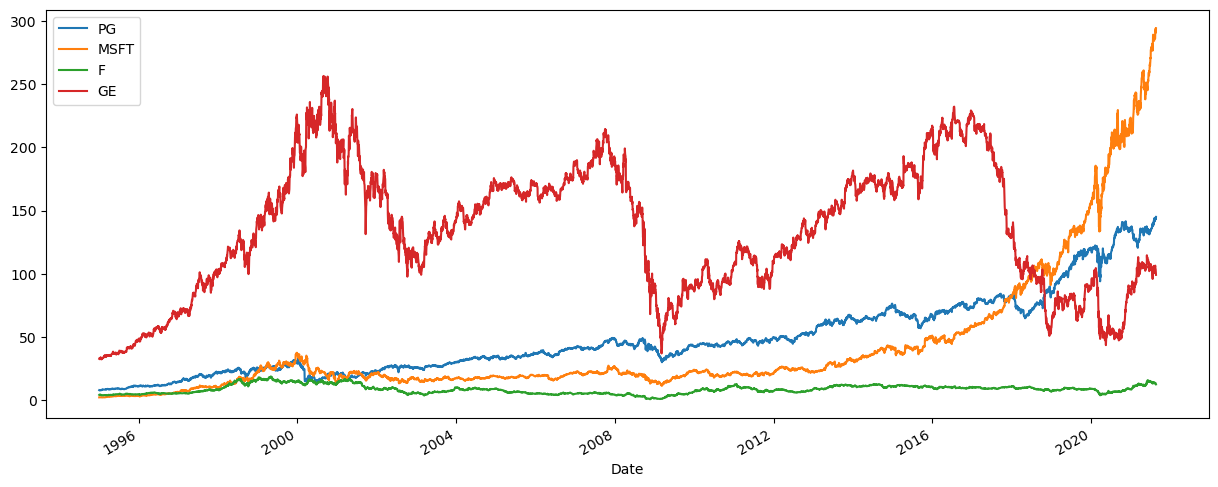

In [33]:
data.plot(figsize=(15,6))
plt.show()

## Calculating the Return of a Portfolio of Securities

In [34]:
#using simple returns
returns = (data/data.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002450
1995-01-06,0.002050,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [36]:
weights = np.array([0.25, 0.25, 0.25, 0.25]) #assuming equal weights for all stocks

In [38]:
np.dot(returns, weights) #np.dot() - calculates vector or matrix products, the output - dot product

array([        nan,  0.00653968, -0.00922995, ..., -0.01378945,
       -0.00458036, -0.00554991])

In [39]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.133026
MSFT    0.228927
F       0.119349
GE      0.092576
dtype: float64

In [41]:
np.dot(annual_returns,weights)

0.14346939149371618

In [45]:
portfolio1 = str(round(np.dot(annual_returns, weights),4) *100) + '%'
print(portfolio1)

14.35%


In [46]:
weights2 = np.array([0.4, 0.4, 0.15, 0.5])

In [47]:
portfolio2 = str(round(np.dot(annual_returns, weights2),4) * 100) + '%'
print(portfolio1)
print(portfolio2)

14.35%
20.9%


## Calculating the Return of Indices

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
tickers = ['^GSPC', '^IXIC', '^DJI', '^VIX']

ind_df = pd.DataFrame()

for t in tickers:
    ind_df[t] = wb.DataReader(t, data_source='yahoo', start = '1997-1-1')['Adj Close']

###### ^GSPC - S&P500
###### ^IXIC - NASDAQ
###### ^DJI - Dow Jones Industrial Average
###### ^VIX - CBOE Volatility Index


In [4]:
ind_df.head()

,^GSPC,^IXIC,^DJI,^VIX
Date,,,,
1996-12-31,740.739990,1291.030029,6448.270020,20.920000
1997-01-02,737.010010,1280.699951,6442.490234,21.139999
1997-01-03,748.030029,1310.680054,6544.089844,19.129999
1997-01-06,747.650024,1316.400024,6567.180176,19.889999
1997-01-07,753.229980,1327.729980,6600.660156,19.350000


In [5]:
ind_df.tail()

,^GSPC,^IXIC,^DJI,^VIX
Date,,,,
2021-08-13,4468.000000,14822.900391,35515.378906,15.450000
2021-08-16,4472.939941,14793.759766,35625.398438,16.120001
2021-08-17,4448.080078,14656.179688,35343.281250,17.910000
2021-08-18,4400.270020,14525.910156,34960.691406,21.570000
2021-08-19,4400.580078,14551.296875,34848.250000,21.059999


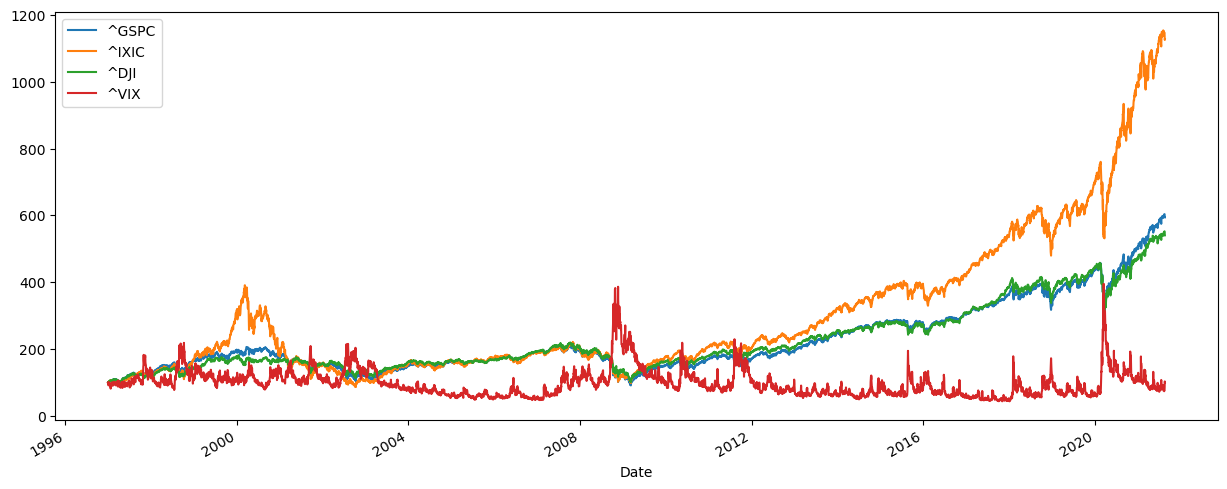

In [6]:
#Normalising to 100
(ind_df / ind_df.iloc[0] * 100).plot(figsize = (15,6))
plt.show()

In [7]:
ind_returns = (ind_df/ind_df.shift(1)) - 1
ind_returns.tail()

,^GSPC,^IXIC,^DJI,^VIX
Date,,,,
2021-08-13,0.001607,0.000448,0.000437,-0.008980
2021-08-16,0.001106,-0.001966,0.003098,0.043366
2021-08-17,-0.005558,-0.009300,-0.007919,0.111042
2021-08-18,-0.010748,-0.008888,-0.010825,0.204355
2021-08-19,0.000070,0.001748,-0.003216,-0.023644


In [8]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC    0.090989
^IXIC    0.129052
^DJI     0.085781
^VIX     0.613808
dtype: float64

In [9]:
tickers = ['PG', '^GSPC', '^DJI']

data_2 = pd.DataFrame()

for t in tickers:
    data_2[t] = wb.DataReader(t, data_source = 'yahoo', start='2007-1-1')['Adj Close']

In [11]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2021-08-13,143.639999,4468.000000,35515.378906
2021-08-16,144.639999,4472.939941,35625.398438
2021-08-17,144.880005,4448.080078,35343.281250
2021-08-18,143.300003,4400.270020,34960.691406
2021-08-19,144.720001,4405.990234,34879.488281


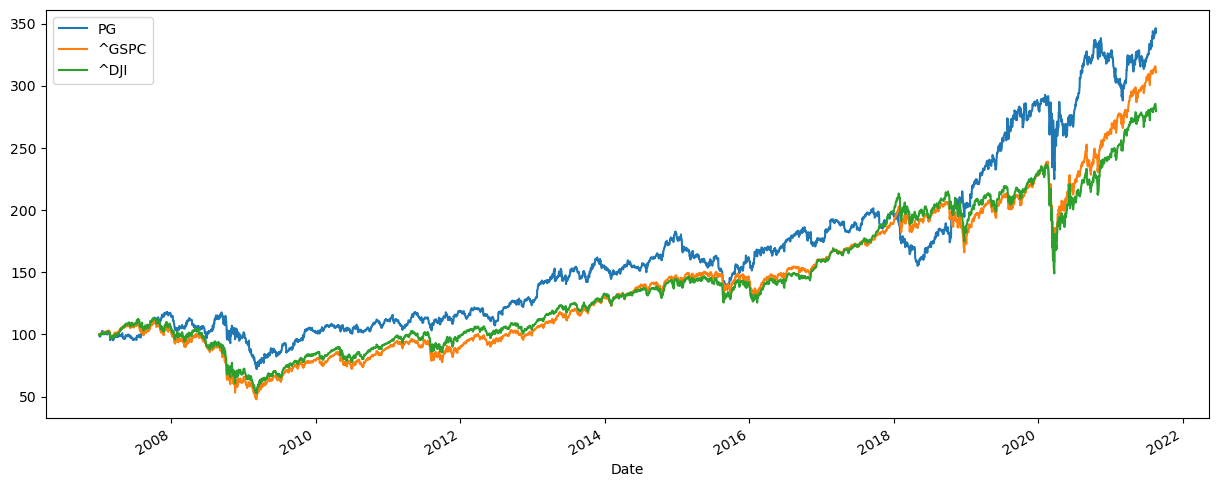

In [10]:
(data_2/data_2.iloc[0] * 100).plot(figsize=(15,6))
plt.show()